In [54]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn import preprocessing
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt


,geometry
0,"POLYGON ((13498006.072 3592692.406, 13498006.0..."
1,"POLYGON ((13499783.695 3592692.406, 13499783.6..."
2,"POLYGON ((13501561.317 3592692.406, 13501561.3..."
3,"POLYGON ((13503338.940 3592692.406, 13503338.9..."
4,"POLYGON ((13505116.562 3592692.406, 13505116.5..."
...,...
2910,"POLYGON ((13503338.940 3697030.642, 13503338.9..."
2911,"POLYGON ((13505116.562 3697030.642, 13505116.5..."
2912,"POLYGON ((13506894.184 3697030.642, 13506894.1..."
2913,"POLYGON ((13508671.807 3697030.642, 13508671.8..."


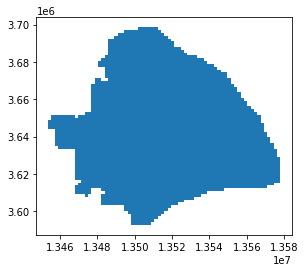

In [55]:
fishnet_graph = gpd.read_file('fishnet4900_shanghai.shp')
fishnet_graph.plot()
fishnet_graph


In [64]:
fishnet_4_dimension = pd.read_excel('POI_Fishnet_for_training.xls')
fishnet_4_dimension = fishnet_4_dimension.drop(columns=['k_index'])
fishnet_4_dimension


,加权合计POI,人口密度,商铺人均消费,房价
0,0.00,1630.702341,0.0,0.0
1,5.90,1630.702341,0.0,0.0
2,0.00,1630.702341,0.0,0.0
3,0.00,1630.702341,0.0,0.0
4,3.15,1630.702341,0.0,0.0
...,...,...,...,...
2910,8.11,819.770512,0.0,0.0
2911,12.25,819.770512,0.0,1400000.0
2912,0.00,819.770512,0.0,0.0
2913,0.00,819.770512,0.0,0.0


In [57]:
columns = list(fishnet_4_dimension.columns)
values = fishnet_4_dimension.values
min_max_scaler = preprocessing.MinMaxScaler()
values_scaled = min_max_scaler.fit_transform(values)
normalized = pd.DataFrame(values_scaled, columns=columns)
normalized

,加权合计POI,人口密度,商铺人均消费,房价
0,0.000000,0.043875,0.0,0.000000
1,0.000938,0.043875,0.0,0.000000
2,0.000000,0.043875,0.0,0.000000
3,0.000000,0.043875,0.0,0.000000
4,0.000501,0.043875,0.0,0.000000
...,...,...,...,...
2910,0.001289,0.022057,0.0,0.000000
2911,0.001948,0.022057,0.0,0.034483
2912,0.000000,0.022057,0.0,0.000000
2913,0.000000,0.022057,0.0,0.000000


In [58]:
kmeans = KMeans(n_clusters=6, random_state=0, n_init=6)
kmeans.fit(normalized)

GM = GaussianMixture(n_components=6)
GM.fit(normalized)

GaussianMixture(n_components=6)

In [59]:
kmeans_out = pd.DataFrame(kmeans.labels_, columns=['K_Means'])
kmeans_out

GaussianMixture = pd.DataFrame(GM.predict(normalized), columns=['GM'])
GaussianMixture


,GM
0,4
1,4
2,4
3,4
4,4
...,...
2910,4
2911,0
2912,4
2913,4


In [60]:
output = fishnet_4_dimension.join(kmeans_out).join(GaussianMixture)
output

,加权合计POI,人口密度,商铺人均消费,房价,K_Means,GM
0,0.00,1630.702341,0.0,0.0,1,4
1,5.90,1630.702341,0.0,0.0,1,4
2,0.00,1630.702341,0.0,0.0,1,4
3,0.00,1630.702341,0.0,0.0,1,4
4,3.15,1630.702341,0.0,0.0,1,4
...,...,...,...,...,...,...
2910,8.11,819.770512,0.0,0.0,1,4
2911,12.25,819.770512,0.0,1400000.0,1,0
2912,0.00,819.770512,0.0,0.0,1,4
2913,0.00,819.770512,0.0,0.0,1,4


In [61]:
data_joined_graph = fishnet_graph.join(output)
data_joined_graph


,geometry,加权合计POI,人口密度,商铺人均消费,房价,K_Means,GM
0,"POLYGON ((13498006.072 3592692.406, 13498006.0...",0.00,1630.702341,0.0,0.0,1,4
1,"POLYGON ((13499783.695 3592692.406, 13499783.6...",5.90,1630.702341,0.0,0.0,1,4
2,"POLYGON ((13501561.317 3592692.406, 13501561.3...",0.00,1630.702341,0.0,0.0,1,4
3,"POLYGON ((13503338.940 3592692.406, 13503338.9...",0.00,1630.702341,0.0,0.0,1,4
4,"POLYGON ((13505116.562 3592692.406, 13505116.5...",3.15,1630.702341,0.0,0.0,1,4
...,...,...,...,...,...,...,...
2910,"POLYGON ((13503338.940 3697030.642, 13503338.9...",8.11,819.770512,0.0,0.0,1,4
2911,"POLYGON ((13505116.562 3697030.642, 13505116.5...",12.25,819.770512,0.0,1400000.0,1,0
2912,"POLYGON ((13506894.184 3697030.642, 13506894.1...",0.00,819.770512,0.0,0.0,1,4
2913,"POLYGON ((13508671.807 3697030.642, 13508671.8...",0.00,819.770512,0.0,0.0,1,4


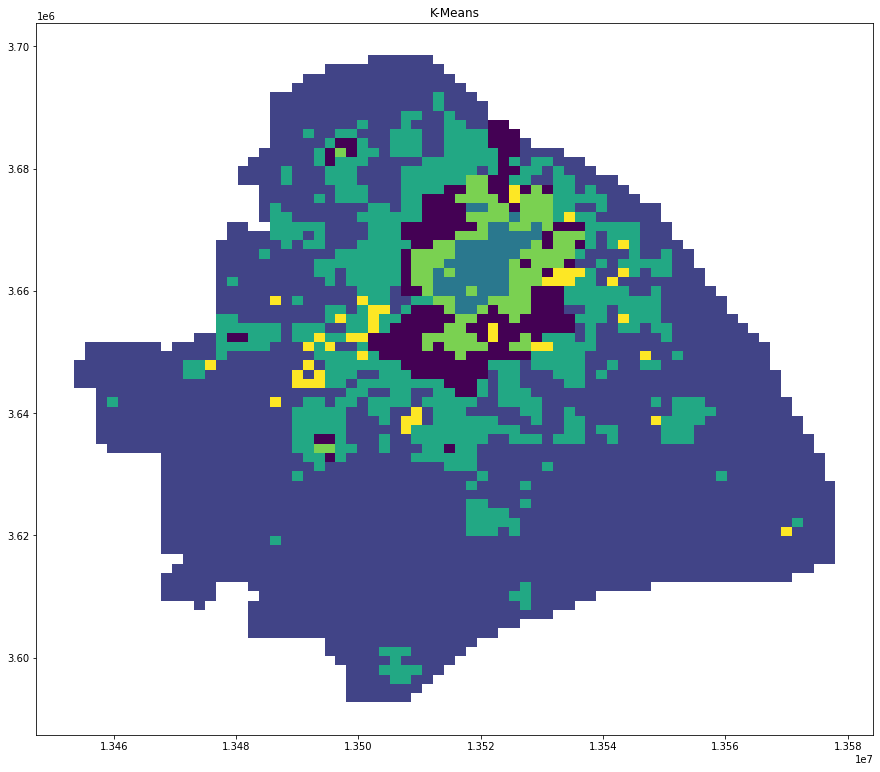

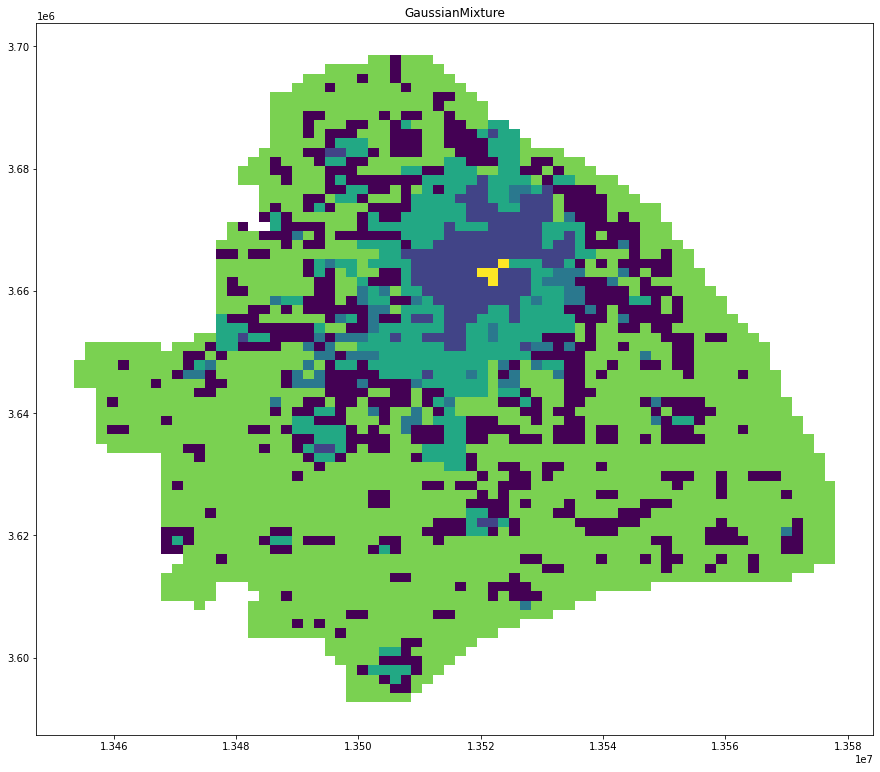

In [69]:
data_joined_graph.plot(cmap='viridis', column='K_Means', figsize=(15,15))
plt.title('K-Means')
plt.show()
data_joined_graph.plot(cmap='viridis', column='GM', figsize=(15, 15))
plt.title('GaussianMixture')
plt.show()
